# Problem statement
Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\PCA Assignments\wine.csv")

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:, 1:])
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 


In [8]:
z = linkage(df_norm, method = "complete", metric = "euclidean")


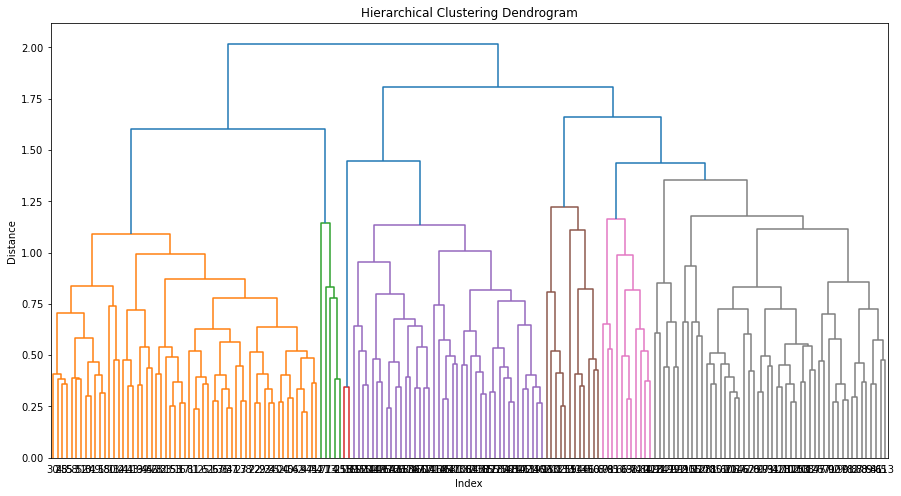

In [9]:
# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [10]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

df['clust'] = cluster_labels # creating a new column and assigning it to new column 


In [11]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


#  K means clustering..

In [12]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist

In [13]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,50)
Y = np.random.uniform(0,1,50)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

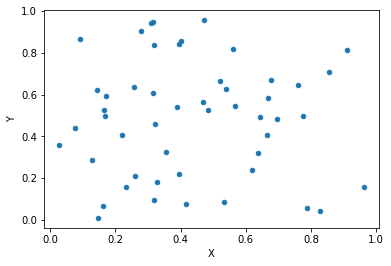

In [14]:
df_xy.plot(x="X", y="Y", kind = "scatter")

In [15]:
model1 = KMeans(n_clusters = 5).fit(df_xy)


<AxesSubplot:xlabel='X', ylabel='Y'>

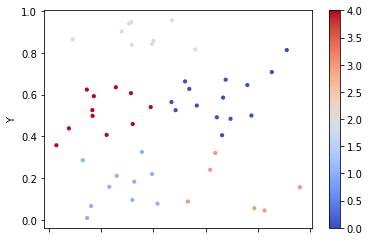

In [16]:
df_xy.plot(x = "X", y = "Y", c = model1.labels_, kind="scatter", s = 10, cmap = plt.cm.coolwarm)


In [17]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    

In [18]:
TWSS

[64.5376670238943,
 48.960517136676465,
 44.769330540824775,
 42.296008065864264,
 39.72025463391064,
 38.33656003929799,
 35.98683639588812]

Text(0, 0.5, 'total_within_SS')

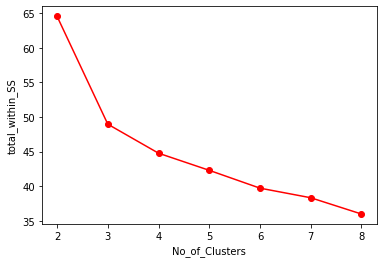

In [19]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")



In [20]:
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [21]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust_k'] = mb # creating a  new column and assigning it to new column 


In [22]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust,clust_k
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


# Principal Component Analysis..

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [24]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(df_norm)

In [25]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671])

In [26]:
# PCA weights
pca.components_
pca.components_[0]

array([-0.13336766,  0.24851581, -0.00073917,  0.17783862, -0.08865728,
       -0.39507087, -0.41458979,  0.33310861, -0.2529021 ,  0.09232904,
       -0.25113726, -0.4734921 , -0.28686211])

In [27]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([40.75, 59.72, 68.28])

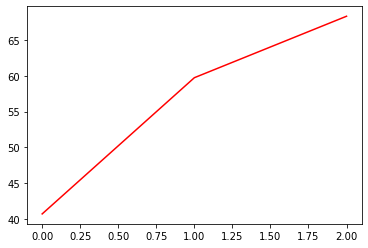

In [28]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [68]:
# PCA scores
pca_values

pca_data = pd.DataFrame(pca_values)



In [69]:
pca_data.head()

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [70]:
pca_data.columns = "comp0", "comp1", "comp2"
final = pd.concat([df.Type, pca_data.iloc[:, 0:3]], axis = 1)

In [71]:
final.head() #creating a pca with 

,Type,comp0,comp1,comp2
0,1,-0.706336,-0.253193,0.024093
1,1,-0.484977,-0.008823,-0.280482
2,1,-0.521172,-0.189187,0.196217
3,1,-0.821644,-0.580906,0.081110
4,1,-0.202546,-0.059467,0.300240


In [48]:
#performing hierarchical clustering on this new data set..

In [49]:
z = linkage(final, method = "complete", metric = "euclidean")

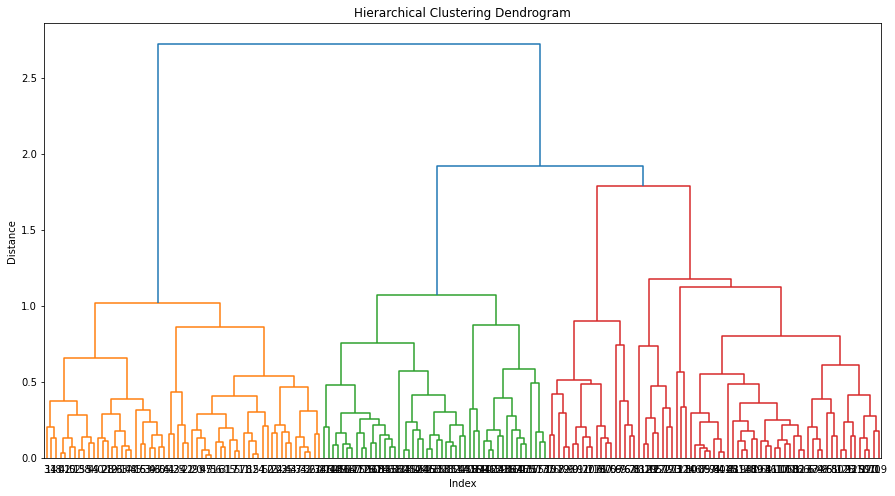

In [50]:
# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [51]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(final) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)



In [52]:
final['clust'] = cluster_labels # creating a new column and assigning it to new column 

final1 = final.iloc[:,:]
final1.head()

,Type,comp0,comp1,comp2,clust
0,1,-0.706336,-0.253193,0.024093,1
1,1,-0.484977,-0.008823,-0.280482,1
2,1,-0.521172,-0.189187,0.196217,1
3,1,-0.821644,-0.580906,0.081110,1
4,1,-0.202546,-0.059467,0.300240,1


# K means clustering on the PCA data Frame..

In [58]:
final.head()

,Type,comp0,comp1,comp2
0,1,-0.706336,-0.253193,0.024093
1,1,-0.484977,-0.008823,-0.280482
2,1,-0.521172,-0.189187,0.196217
3,1,-0.821644,-0.580906,0.081110
4,1,-0.202546,-0.059467,0.300240


In [60]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final)
    TWSS.append(kmeans.inertia_)
    
TWSS


[68.97041817044251,
 20.213819317950747,
 16.470135603568966,
 14.481179871907775,
 12.850170275947866,
 11.672308012314376,
 10.168419835748448]

Text(0, 0.5, 'total_within_SS')

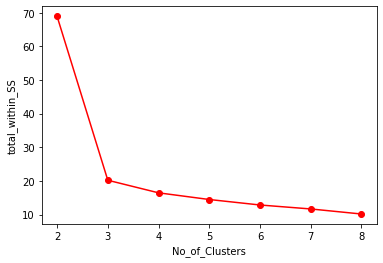

In [61]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [62]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(final)


KMeans(n_clusters=3)

In [64]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
final['clust'] = mb # creating a  new column and assigning it to new column 


In [65]:
final.head()

,Type,comp0,comp1,comp2,clust
0,1,-0.706336,-0.253193,0.024093,2
1,1,-0.484977,-0.008823,-0.280482,2
2,1,-0.521172,-0.189187,0.196217,2
3,1,-0.821644,-0.580906,0.081110,2
4,1,-0.202546,-0.059467,0.300240,2


# Scree plot after PCA

In [66]:
#scree plot after PCA 
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final)
    TWSS.append(kmeans.inertia_)
    
TWSS



[97.60907363262741,
 20.213819317950747,
 16.46480432541981,
 14.415439778821485,
 13.002996555594224,
 11.703856084242283,
 10.177703566612031]

Text(0, 0.5, 'total_within_SS')

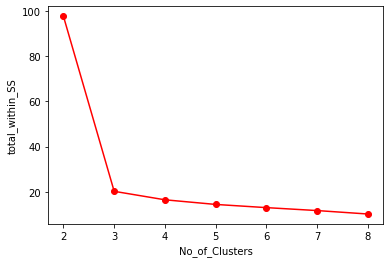

In [67]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


# Scree plot before PCA..

In [72]:
#Scree plot before PCA..
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final)
    TWSS.append(kmeans.inertia_)
    
TWSS

[68.97041817044251,
 20.213819317950747,
 16.469873293649947,
 14.451054899874771,
 12.976773870953656,
 11.494601145422383,
 10.151114882204975]

In [73]:
model = KMeans(n_clusters = 3)
model.fit(final)


KMeans(n_clusters=3)

Text(0, 0.5, 'total_within_SS')

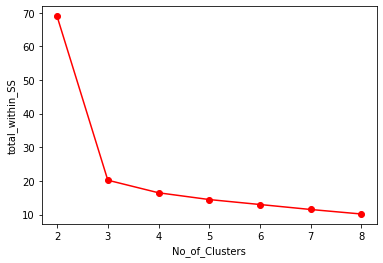

In [74]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")
